In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [15]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Classification model evaluation

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

1. Accuracy

In [17]:
cross_val_score_results = cross_val_score(clf, X, y, cv=5)
mean_score = np.mean(cross_val_score_results)

In [18]:
mean_score = np.mean(cross_val_score_results)
print(f"Heart Disease Classifier Cross-Validated accuracy: {mean_score * 100:.2f}%")

Heart Disease Classifier Cross-Validated accuracy: 81.16%


2. Area under ROC curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive -> model 1, truth 1
* False Positive -> model 1, truth 0
* True negative -> model 0, truth 0
* False negative -> model 0, truth 1

In [19]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [20]:
y_probs_positives = y_probs[:, 1]

fpr, tpr, tresholds = roc_curve(y_test, y_probs_positives)

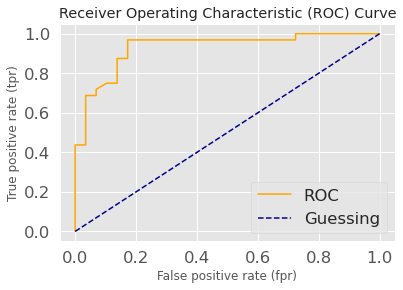

In [21]:
def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model.
  """

  plt.plot(fpr, tpr, color="orange", label="ROC")
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positives)

0.9304956896551724

3. Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [24]:
pd.crosstab(y_test, y_preds, rownames=["Actual labels"], colnames=["Predicted labes"])

Predicted labes,0,1
Actual labels,,
0,24,5
1,4,28


<AxesSubplot:>

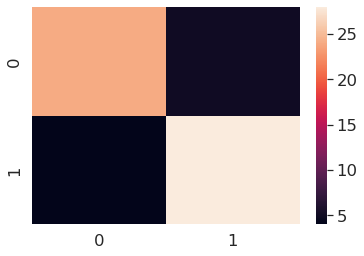

In [26]:
# Old method

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

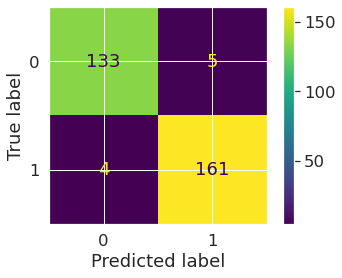

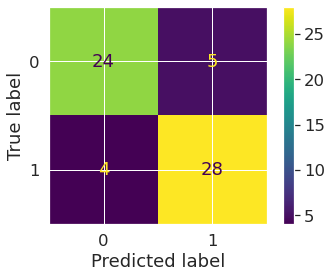

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

4. Classification report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

